 <h3 style="text-align: center;"><font size="6">Visualizing Object Based Image Analysis</font></h3>
<h4 style="text-align: center;"><font size="4"><i>A tool to aid in classifying remote sensing data</i></font></h4>
Classification is the process of grouping objects in an image into classes based on what they are. For example, a land-cover classification will often contain class for urban areas, forest, water, and agriculture. One method of classifying remotely sensed data is called 'Object-Based-Image-Analysis' or OBIA. OBIA groups, or segments, pixels in an image together based on their values, creating <i>image objects</i>. These image objects can then be classified according to what they represent. Objects can be classified by the information related not only to their pixel values (i.e. red, green, blue, near-infrared values), but also by the other <i> elements of image interpretation</i>:
<ul style="list-style-type:disc;">
  <li>tone/color</li>
  <li>size</li>
  <li>shape</li>
    <li>texture </li>
    <li>pattern </li>
    <li>shadow</li>
    <li>site</li>
    <li>association </li>
</ul> 
<br>
This notebook is a tool to aid in determining which parameters will classify image objects as desired, by providing an interactive visualization of these parameters.

The notebook takes as input a shapefile exported from eCognition with image object statistics ('mean NDVI', GLCM Homogeneity, 'mean Elevation', etc.) calculated. This shapefile may also already contain some classes, to allow for restricting the visualization further.

#### Run the first cell to input your shapefile:

In [1]:
# Enter the path to the shapefile exported from eCognition, containing feature attributes 
# shp_in = input('Path to shapefile: ')
# shp_path = r'{}'.format(shp_in)

# Alternatively, use this demo shapefile
shp_path = r'V:\pgc\data\scratch\jeff\ms\scratch\aoi6_good\seg\WV02_20150906_clip_ms_lsms_sr5rr200ss400_stats.shp'

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from ipywidgets import interact, interactive, fixed, interact_manual, Checkbox, Layout
import ipywidgets as widgets
from IPython.display import display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Read the file into geopandas
shp = gpd.read_file(shp_path)
shp.head()

,label,nbPixels,meanB0,meanB1,meanB2,meanB3,meanB4,meanB5,meanB6,meanB7,...,diff_mean,diffndvi_m,diffndvi_1,diffndvi_2,ndvi_min,ndvi_max,ndvi_mean,area_m,compact,geometry
0,8,470,975.740417,846.668091,741.719177,682.063843,718.885132,647.229797,721.378723,611.278748,...,-0.349691,-0.180955,-0.020061,-0.077499,-0.052330,0.047766,0.002365,136.272180,0.201112,"POLYGON ((-1752074.484 -558045.423, -1752048.9..."
1,12,476,949.069336,816.086121,696.737366,622.411743,650.449585,571.741577,642.268921,537.697449,...,-0.209990,-0.207481,-0.034476,-0.078315,-0.072065,0.053512,-0.005433,138.011825,0.168417,"POLYGON ((-1752048.957 -558045.423, -1752036.7..."
2,205,917,1050.007690,951.898560,896.930237,890.019653,943.801514,861.258423,914.695740,765.061096,...,-0.639082,-0.250394,-0.006737,-0.045018,-0.122995,0.012791,-0.017661,265.875721,0.292222,"POLYGON ((-1752070.399 -558050.534, -1752066.8..."
3,1,1470,985.734009,870.038757,794.068054,761.442871,804.283020,741.761902,809.204773,689.134705,...,-0.331590,-0.110453,-0.013676,-0.045655,-0.041060,0.058824,0.003046,426.212987,0.378386,"POLYGON ((-1752097.969 -558045.423, -1752076.5..."
4,7,530,1021.352844,903.949036,828.813232,818.890564,849.818848,792.243408,839.496216,716.277344,...,-0.474951,-0.142328,0.017379,-0.054561,-0.053168,0.082495,-0.006495,153.668628,0.086662,"POLYGON ((-1752076.526 -558045.423, -1752074.4..."


In [5]:
shp.describe()

,label,nbPixels,meanB0,meanB1,meanB2,meanB3,meanB4,meanB5,meanB6,meanB7,...,diff_max,diff_mean,diffndvi_m,diffndvi_1,diffndvi_2,ndvi_min,ndvi_max,ndvi_mean,area_m,compact
count,3068.000000,3.068000e+03,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,...,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000
mean,363907.346806,3.514895e+03,934.512541,807.234373,685.183980,618.729824,646.380606,587.203722,668.172177,580.303564,...,0.224233,-0.354060,-0.200570,0.050248,-0.073470,-0.108239,0.087946,0.006191,1019.111603,0.180619
std,197096.719732,4.338792e+04,66.184749,72.697130,95.234813,112.542263,125.661507,130.696026,149.404655,142.390784,...,0.609291,0.726042,0.161121,0.137479,0.061460,0.167224,0.060829,0.080040,12579.927376,0.077814
min,1.000000,4.000000e+02,15.822580,12.085254,7.707373,5.020737,4.357143,1.995392,0.891705,0.018692,...,-7.043945,-8.545166,-1.079337,-0.648179,-0.720399,-0.975962,-0.638225,-0.670479,115.976323,0.007075
25%,207518.000000,5.650000e+02,902.722000,768.129868,624.267792,546.043716,565.857819,510.053101,597.999741,519.837601,...,0.064453,-0.391838,-0.204568,-0.011730,-0.075738,-0.114549,0.055800,0.001334,163.816556,0.121814
50%,353192.500000,8.235000e+02,939.546356,811.021240,689.296967,621.253632,652.610718,595.804535,693.682281,605.984711,...,0.231445,-0.256110,-0.145162,0.009609,-0.061738,-0.047850,0.087007,0.023708,238.766255,0.170727
75%,542091.500000,1.584250e+03,967.338684,843.622940,740.236832,682.419464,720.119751,662.026596,755.065826,663.262177,...,0.415039,-0.139633,-0.113805,0.043075,-0.052195,-0.016890,0.118929,0.038701,459.338725,0.229369
max,720158.000000,1.971914e+06,1294.584839,1306.330200,1316.887329,1335.677490,1422.293213,1369.739258,1458.487671,1306.890381,...,6.133789,2.345819,-0.011603,0.980490,0.356075,0.129057,0.363272,0.240612,571738.338045,0.487221


In [6]:
shp.dtypes

label            int64
nbPixels         int64
meanB0         float64
meanB1         float64
meanB2         float64
meanB3         float64
meanB4         float64
meanB5         float64
meanB6         float64
meanB7         float64
varB0          float64
varB1          float64
varB2          float64
varB3          float64
varB4          float64
varB5          float64
varB6          float64
varB7          float64
roughness_     float64
roughnes_1     float64
roughnes_2     float64
tpi31_min      float64
tpi31_max      float64
tpi31_mean     float64
tpi31_std      float64
tpi41_min      float64
tpi41_max      float64
tpi41_mean     float64
tpi41_std      float64
tpi81_min      float64
tpi81_max      float64
tpi81_mean     float64
tpi81_std      float64
slope_max      float64
slope_mean     float64
slope_std      float64
diff_min       float64
diff_max       float64
diff_mean      float64
diffndvi_m     float64
diffndvi_1     float64
diffndvi_2     float64
ndvi_min       float64
ndvi_max   

In [7]:
### Get information from shapefile for interacting and displaying
# Define attribute column to display on load
att1 = 'tpi81_mean' 

# Create a fake attribute for additional visualizing
att2 = 'slope_mean'

# Exclude the geometry and Class fields from the attributes that are options to display
exclude = ['geometry', 'Class']
attributes = [fld for fld in list(shp) if fld not in exclude]
# print('Attributes available for visualizing: {}'.format(attributes))

# Get classes in the shapefile
shp['Class'] = 'Unclassified'
all_classes = shp['Class'].unique()
print('Classes available for visualizing: {}'.format(all_classes))

Classes available for visualizing: ['Unclassified']


grid (2, 4)
rs 2
cs 3


NameError: name 'ax' is not defined

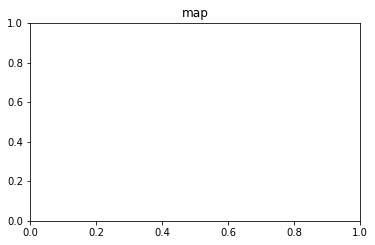

In [8]:
# Create checkboxes for each class - to include or exlude that class from the visualization
chk = [Checkbox(description=a) for a in all_classes]


# Slider controls
def update_sliders(*args):
    # Dynamically get minimum and maximum values for the attribute chosen
    att_min = shp[att_dd.value].min()
    att_max = shp[att_dd.value].max()
    # Dynamically create a step size
    step = (att_max - att_min) / 25
    
    # Set slider minimum and maximum limits and step size
    min_slider.min = att_min - step
    max_slider.min = att_min - step
    min_slider.max = att_max + step 
    max_slider.max = att_max + step
    min_slider.value = att_min 
    max_slider.value = att_max
    min_slider.step = step
    max_slider.step = step
    

# Function to plot and display attributes
atts = ['ndvi_mean', 'slope_mean']
def att_thresh(classes=[], ):
    
    # Define map to histogram size ratio
    ratio = [3,1]
    # Get number of attributes to be plotted
    num_atts = len(atts) if len(atts) > 0 else 0
    
    ## Create figure
    fig = plt.figure(1, figsize=(8,8))
    grid = (num_atts, sum(ratio))
    print('grid', grid)
    gridspec.GridSpec(grid[0], grid[1])
    print('rs', num_atts)
    print('cs', ratio[0])
    # Add map
    map_ax = plt.subplot2grid(grid, (1,0), rowspan=num_atts, colspan=ratio[0])
    map_ax.set_title('map')
    shp.plot(ax=ax)
    
    # Add attribute histograms and threshold map
    selection = shp
    ax_pos_row = ratio[0] # zero indexed, so subtract 1
    ax_pos_col = 0
    print('pr', ax_pos_row)
    print('pc', ax_pos_col)
    for att in atts:
        loc = (ax_pos_row, ax_pos_col)
#         loc = (0,3)
        print(att, loc)
        hist_ax = plt.subplot2grid(grid, loc)
        N, bins, patchs = hist_ax.hist(selection[att], bins=20)
        ax_pos_row +=1
        
att_thresh(atts)


The next cell creates the interactive display for visualizing the attributes in the shapefile. <br>
Try different combinations of attributes, ranges, and classes. <br>
The histogram displays the range of values within your selected parameters, and the image highlights the image objects that meet your parameters.<br>
<br>
<span style="color:red">
***You must select at least one class before anything will display.***</span>

In [ ]:
# Make interactive display
# Set up slider bars, one for the minimum value to display, one for the maximum
min_slider = widgets.FloatSlider(min=0.000, max=100.000, step=0.001)
max_slider = widgets.FloatSlider(min=0.000, max=100.000, step=0.001)    

# Create attributes dropdown menu and then watch it for changes and update it changed
att_dd = widgets.Dropdown(options=attributes, value=attributes[0], description='Attribute:')
att_dd.observe(update_sliders, 'value')

b = interactive(att_range, {'manual': True}, att=att_dd, range_min=min_slider, range_max=max_slider, 
                checks={c.description: c.value for c in chk})
display(b)

In [ ]:
def kwf(a, **kwargs):
    print(a)
#     print([(k,v) for k, v in kwargs.items()])
    print([(k,v) for k, v in kwargs['checks'].items()])
    
kwf(1, checks={c.description: c.value for c in chk}, other_kw=[1,2,3])

In [ ]:
fig = plt.figure(1)
gridspec.GridSpec(3,3)
ax = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
ax.plot([1,2,3], [1,2,3])